In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# for more than 3000 row the target data was ot there we have no use with that we have remove to with the null values of raintoday and tomorrow

In [5]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

# Exploratory data analysis and visualization

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

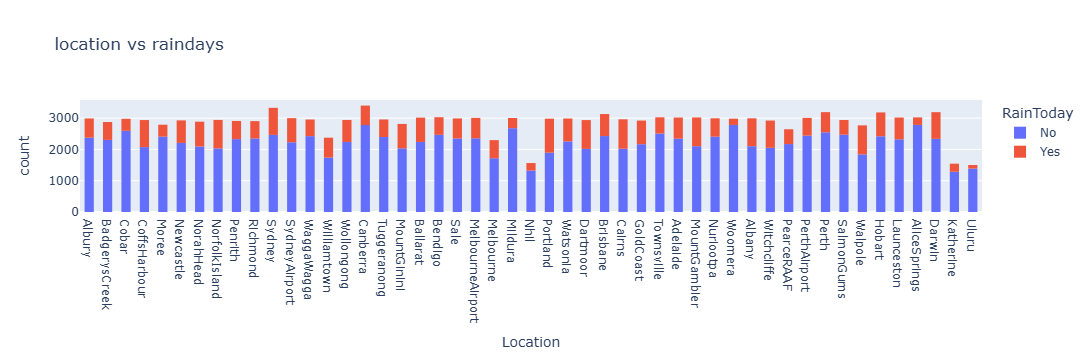

In [9]:
fig=px.histogram(df,x='Location',title='location vs raindays',color='RainToday')
fig.update_layout(bargap=0.5)
fig.show()

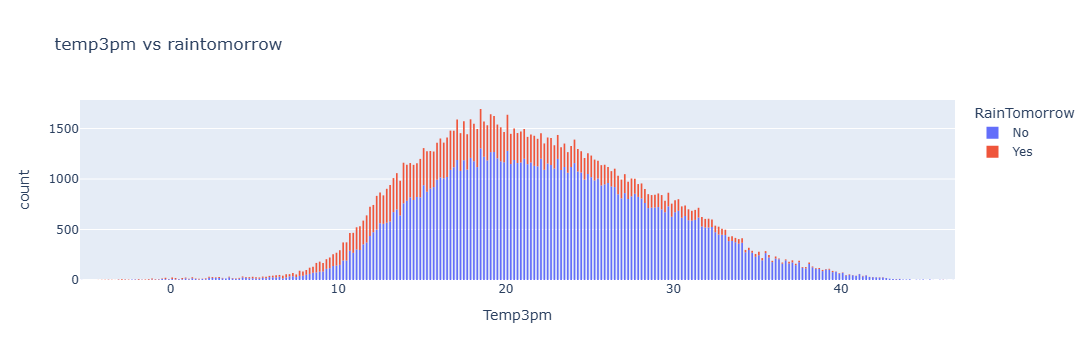

In [10]:
fig=px.histogram(df,x='Temp3pm',title='temp3pm vs raintomorrow',color='RainTomorrow')
fig.update_layout(bargap=0.5)
fig.show()

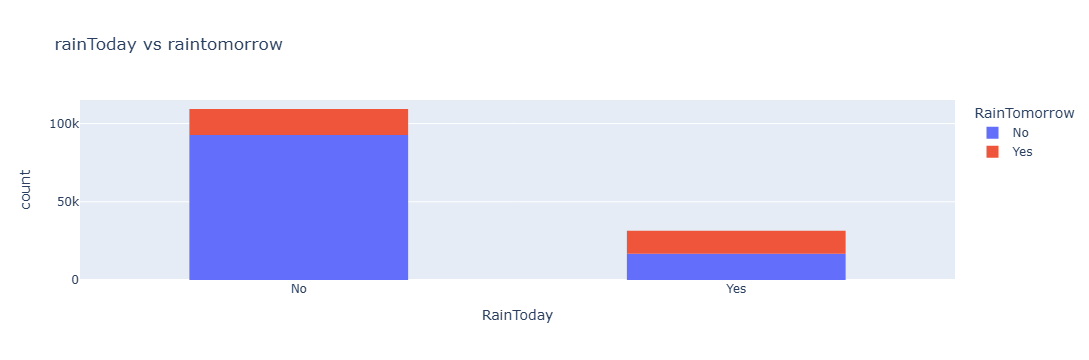

In [11]:
fig=px.histogram(df,x='RainToday',title='rainToday vs raintomorrow',color='RainTomorrow')
fig.update_layout(bargap=0.5)
fig.show()

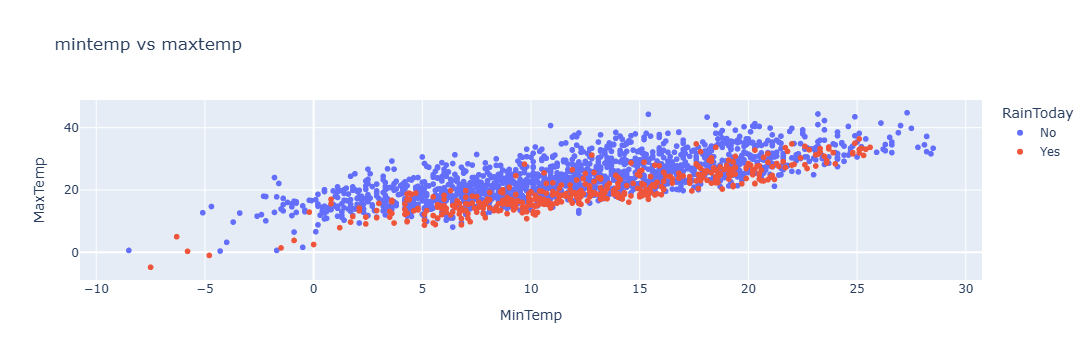

In [12]:
px.scatter(df.sample(2000),x='MinTemp',
           y='MaxTemp'
           ,color='RainToday',
           title='mintemp vs maxtemp')


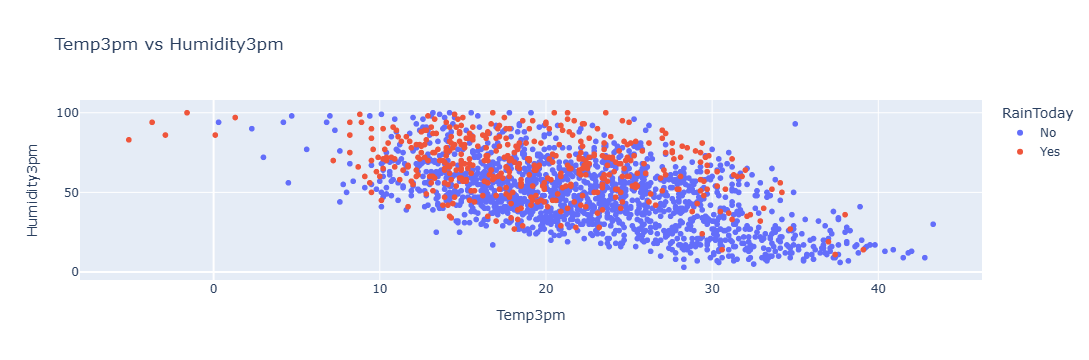

In [13]:
px.scatter(df.sample(2000),x='Temp3pm',
           y='Humidity3pm'
           ,color='RainToday',
           title='Temp3pm vs Humidity3pm')

<Axes: >

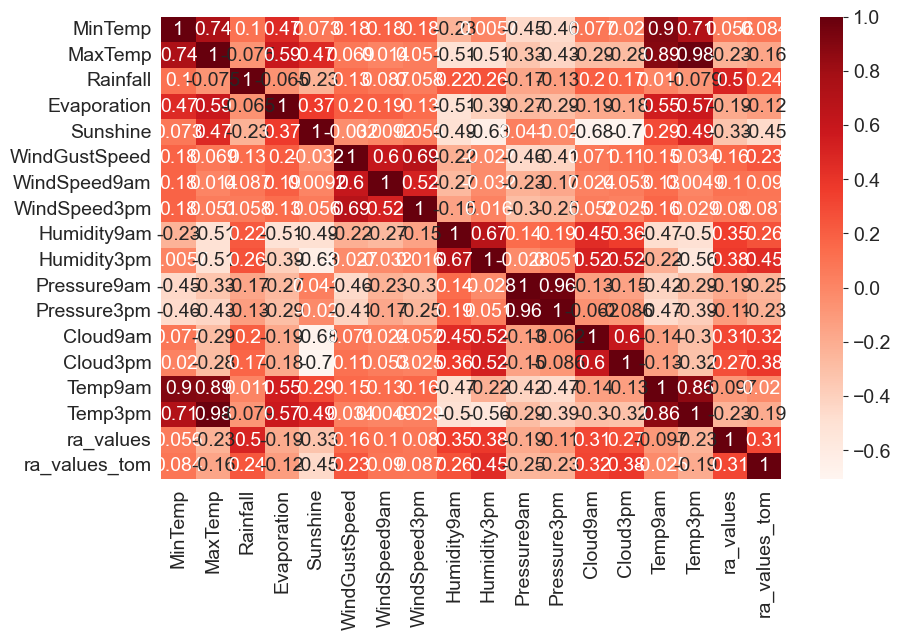

In [14]:
rainToday_vau={'No':0,'Yes':1}
ra_valu=df.RainToday.map(rainToday_vau)
ra_valTo=df.RainTomorrow.map(rainToday_vau)
df['ra_values']=ra_valu
df['ra_values_tom']=ra_valTo
sns.heatmap(df.corr(numeric_only=True),cmap='Reds',annot=True)

# we are dividing into train test normally the dataset will be divided into 3 sets
### 1) train data set (60 percent)
### 2) validation set -> for the train itself(20 percent)
### 3) test dataset(20 percent)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_val_df,test_df=train_test_split(df,test_size=0.20,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

### normally with date in the dataset we can not use future value to train for predict the past so we are  divide based on the dates

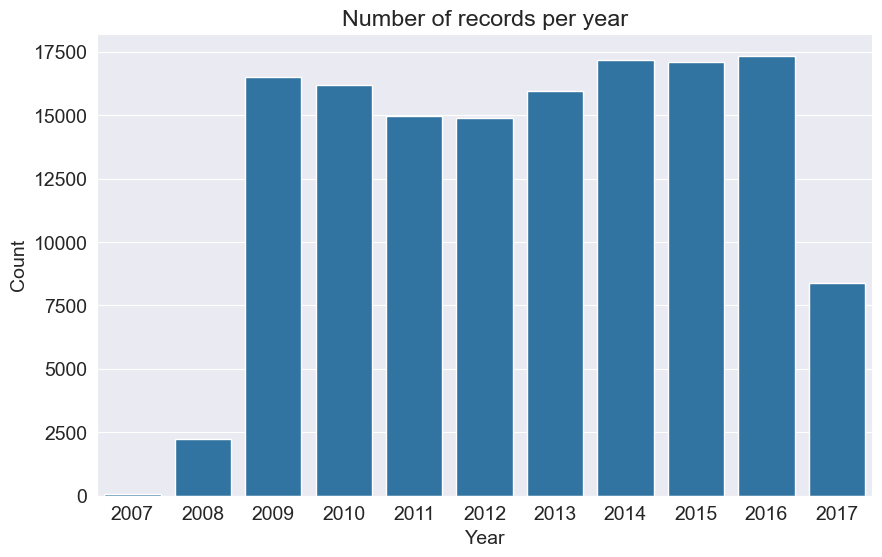

In [19]:
sns.countplot(x=pd.to_datetime(df['Date']).dt.year)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of records per year")
plt.show()


In [23]:
df['year']=pd.to_datetime(df['Date']).dt.year
train_df=df[year <2015]
val_df=df[year==2015]
test_df=df[year > 2015]

In [28]:
ap=[train_df.shape,val_df.shape,test_df.shape]
ap

[(97988, 26), (17089, 26), (25710, 26)]

In [40]:
input_col=list(train_df.columns)[1:-4]
target='RainTomorrow'

In [41]:
input_col

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [42]:
train_inputs=train_df[input_col].copy()
train_target=train_df[target].copy()
val_inputs=val_df[input_col].copy()
val_target=val_df[target].copy()
test_input=test_df[input_col].copy()
test_target=test_df[target].copy()

In [45]:
import numpy as np

### creating a list with the numeric and catagorical names so we will be helpful

In [48]:
numeric_col=train_inputs.select_dtypes(include=np.number).columns.tolist()
cata_col = train_inputs.select_dtypes('object').columns.tolist()

In [51]:
train_inputs[numeric_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

### there are multiple none values so me have fill the values 
### the process is imputation
### simple imputation is filling the null values with mean value

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer=SimpleImputer(strategy='mean')

In [55]:
imputer.fit(df[numeric_col])

SimpleImputer()

In [57]:
train_inputs[numeric_col]=imputer.transform(train_inputs[numeric_col])
val_inputs[numeric_col]=imputer.transform(val_inputs[numeric_col])
test_input[numeric_col]=imputer.transform(test_input[numeric_col])

### to check after imputation how many null values

In [59]:
train_inputs[numeric_col].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler=MinMaxScaler()

In [62]:
scaler.fit(train_inputs[numeric_col])

MinMaxScaler()

In [146]:
train_inputs[numeric_col]=scaler.transform(train_inputs[numeric_col])
val_inputs[numeric_col]=scaler.transform(val_inputs[numeric_col])
test_input[numeric_col]=scaler.transform(test_input[numeric_col])

In [65]:
train_inputs[numeric_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.519590      0.006396      0.065020      0.532714   
std        0.149458      0.133673      0.022962      0.038060      0.203741   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.377358      0.421456      0.000000      0.046117      0.524476   
50%        0.478774      0.507663      0.000000      0.066414      0.533604   
75%        0.591981      0.613027      0.002156      0.067961      0.643357   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.161970      0.215668      0.686309      0.514693   
std         0.102420      0.102805      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.080460      0.149425      0.570000      0.370000   
50%         0.255814      0.149425      0.218391      0.690000      0.520000   
75%         0.310078      0.218391      0.275862      0.830000      0.650000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.596437      0.483192      0.493693      0.493189   
std        0.111335      0.109954      0.255486      0.238028      0.138521   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.543802      0.526403      0.333333      0.333333      0.392625   
50%        0.614125      0.598316      0.492351      0.499917      0.488069   
75%        0.682645      0.665017      0.666667      0.666667      0.590022   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.520333  
std        0.133024  
min        0.000000  
25%        0.423828  
50%        0.509766  
75%        0.609375  
max        1.000000

In [72]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [74]:
enc.fit(df[cata_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [75]:
enc.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [82]:
enc_col = enc.get_feature_names_out(cata_col)
print(enc_col)


['Location_Adelaide' 'Location_Albany' 'Location_Albury'
 'Location_AliceSprings' 'Location_BadgerysCreek' 'Location_Ballarat'
 'Location_Bendigo' 'Location_Brisbane' 'Location_Cairns'
 'Location_Canberra' 'Location_Cobar' 'Location_CoffsHarbour'
 'Location_Dartmoor' 'Location_Darwin' 'Location_GoldCoast'
 'Location_Hobart' 'Location_Katherine' 'Location_Launceston'
 'Location_Melbourne' 'Location_MelbourneAirport' 'Location_Mildura'
 'Location_Moree' 'Location_MountGambier' 'Location_MountGinini'
 'Location_Newcastle' 'Location_Nhil' 'Location_NorahHead'
 'Location_NorfolkIsland' 'Location_Nuriootpa' 'Location_PearceRAAF'
 'Location_Penrith' 'Location_Perth' 'Location_PerthAirport'
 'Location_Portland' 'Location_Richmond' 'Location_Sale'
 'Location_SalmonGums' 'Location_Sydney' 'Location_SydneyAirport'
 'Location_Townsville' 'Location_Tuggeranong' 'Location_Uluru'
 'Location_WaggaWagga' 'Location_Walpole' 'Location_Watsonia'
 'Location_Williamtown' 'Location_Witchcliffe' 'Location_Wol

In [83]:
df = df.copy()   # this will produce a defragmented DataFrame

In [84]:
train_inputs[enc_col]=enc.transform(train_inputs[cata_col])
val_inputs[enc_col]=enc.transform(val_inputs[cata_col])
test_input[enc_col]=enc.transform(test_input[cata_col])

In [85]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.517241  0.001617     0.066414  0.533604   
1        Albury  0.375000  0.559387  0.000000     0.066414  0.533604   
2        Albury  0.504717  0.570881  0.000000     0.066414  0.533604   
3        Albury  0.417453  0.614943  0.000000     0.066414  0.533604   
4        Albury  0.613208  0.697318  0.002695     0.066414  0.533604   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.714559  0.000000     0.066414  0.533604   
144549    Uluru  0.556604  0.783525  0.000000     0.066414  0.533604   
144550    Uluru  0.608491  0.802682  0.000000     0.066414  0.533604   
144551    Uluru  0.674528  0.816092  0.000000     0.066414  0.533604   
144552    Uluru  0.731132  0.837165  0.000000     0.066414  0.533604   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
0                W       0.294574          W        WNW  ...            0.0   
1              WNW       0.294574        NNW        WSW  ...            0.0   
2              WSW       0.310078          W        WSW  ...            0.0   
3               NE       0.139535         SE          E  ...            0.0   
4                W       0.271318        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE       0.286822        ESE        SSE  ...            0.0   
144549          NE       0.193798        ENE         SW  ...            0.0   
144550         ESE       0.255814        ESE        SSE  ...            0.0   
144551         ESE       0.286822        ESE        SSW  ...            0.0   
144552         WNW       0.542636        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
144548            0.0  
144549            0.0  
144550            0.0  
144551            0.0  
144552            0.0  

[97988 rows x 123 columns]

# saving for future help

In [92]:
!pip install fastparquet


   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   ------------------------------- -------- 524.3/673.3 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 673.3/673.3 kB 8.9 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.1 MB/s  0:00:00

   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   -------------------------- ------------- 2/3 [fastparquet]
   ---------------------------------------- 3/3 [fastparquet]



In [102]:
train_inputs.to_parquet('train_inputs.parquet', engine='fastparquet')
val_inputs.to_parquet('val_inputs.parquet', engine='fastparquet')
test_input.to_parquet('test_input.parquet', engine='fastparquet')
train_target.to_frame(name='RainTomorrow_num').to_parquet('train_target.parquet', engine='fastparquet')
val_target.to_frame(name='RainTomorrow_num').to_parquet('val_target.parquet', engine='fastparquet')
test_target.to_frame(name='RainTomorrow_num').to_parquet('test_target.parquet', engine='fastparquet')


In [103]:
train_inputs = pd.read_parquet('train_inputs.parquet', engine='fastparquet')
val_inputs   = pd.read_parquet('val_inputs.parquet', engine='fastparquet')
test_inputs  = pd.read_parquet('test_input.parquet', engine='fastparquet')

target_col = 'RainTomorrow_num'

train_target = pd.read_parquet('train_target.parquet', engine='fastparquet')[target_col]
val_target   = pd.read_parquet('val_target.parquet', engine='fastparquet')[target_col]
test_target  = pd.read_parquet('test_target.parquet', engine='fastparquet')[target_col]


In [104]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
index                                                                  
0        Albury  0.516509  0.517241  0.001617     0.066414  0.533604   
1        Albury  0.375000  0.559387  0.000000     0.066414  0.533604   
2        Albury  0.504717  0.570881  0.000000     0.066414  0.533604   
3        Albury  0.417453  0.614943  0.000000     0.066414  0.533604   
4        Albury  0.613208  0.697318  0.002695     0.066414  0.533604   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.714559  0.000000     0.066414  0.533604   
144549    Uluru  0.556604  0.783525  0.000000     0.066414  0.533604   
144550    Uluru  0.608491  0.802682  0.000000     0.066414  0.533604   
144551    Uluru  0.674528  0.816092  0.000000     0.066414  0.533604   
144552    Uluru  0.731132  0.837165  0.000000     0.066414  0.533604   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
index                                                    ...                  
0                W       0.294574          W        WNW  ...            0.0   
1              WNW       0.294574        NNW        WSW  ...            0.0   
2              WSW       0.310078          W        WSW  ...            0.0   
3               NE       0.139535         SE          E  ...            0.0   
4                W       0.271318        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE       0.286822        ESE        SSE  ...            0.0   
144549          NE       0.193798        ENE         SW  ...            0.0   
144550         ESE       0.255814        ESE        SSE  ...            0.0   
144551         ESE       0.286822        ESE        SSW  ...            0.0   
144552         WNW       0.542636        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
index                                                                 
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
index                                                                  
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
index                  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...          

# logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model=LogisticRegression(solver='liblinear')

In [112]:
feature=list(numeric_col)+list(enc_col)
model.fit(train_inputs[feature],train_target)

LogisticRegression(solver='liblinear')

In [115]:
train_pre=model.predict(train_inputs[feature])

# we have created a model and fit the model and predicted the outputs and now accuracy

In [119]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(train_pre,train_target)

0.8519920806629383

In [122]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(train_pre,train_target,normalize='true')

array([[0.87384701, 0.12615299],
       [0.26444947, 0.73555053]])

In [126]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds


Accuracy: 85.20%


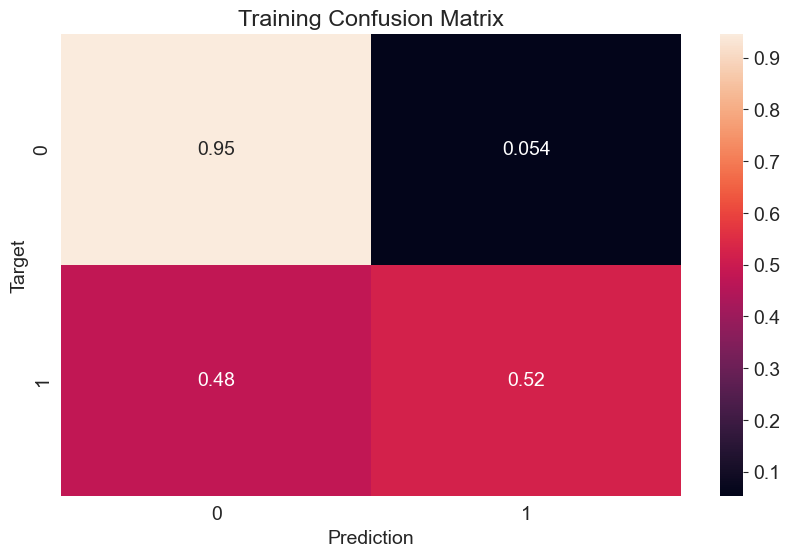

In [128]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

In [139]:
val_pre=model.predict(val_inputs[feature])

In [140]:
accuracy_score(val_pre,val_target)

0.854058166071742

In [141]:
confusion_matrix(val_pre,val_target,normalize='true')

array([[0.87021977, 0.12978023],
       [0.25475113, 0.74524887]])

Accuracy: 85.41%


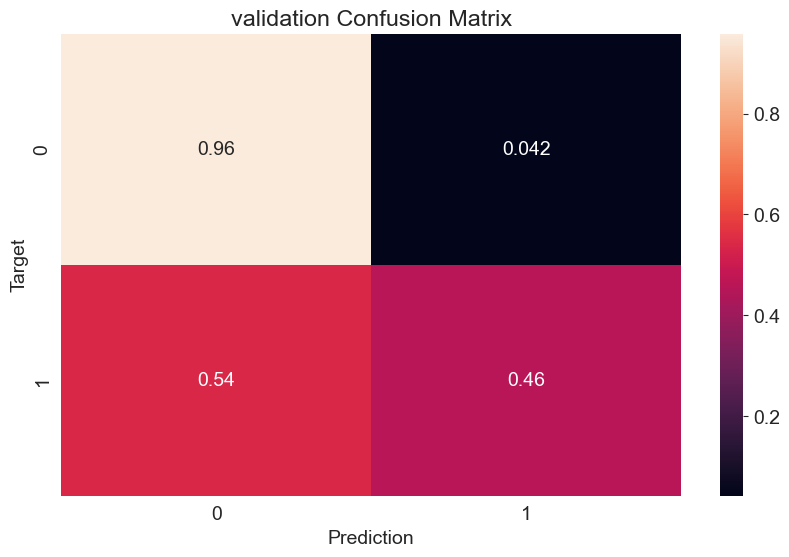

In [144]:
val_preds = predict_and_plot(val_inputs[feature], val_target, 'validation')

Accuracy: 84.19%


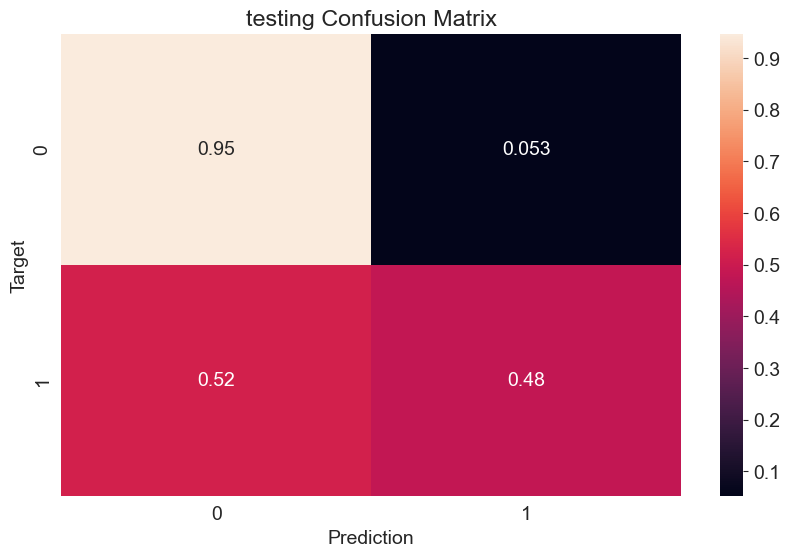

In [145]:
test_preds = predict_and_plot(test_inputs[feature], test_target, 'testing')